<center>Заметка 1.  Базовые понятия машинного обучения, регрессия.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.12</center>

<center>Аннотация</center>
<p>
Вводятся базовые элементы пакета линейной алгебры (Numpy) относфщейся к питону (Python версии 3.xx). Конкретно речь идет о алгебре и, соотвествено, линейной регресии.
Последнее, в частности, используется для ввода ключевых понятий из машинного обучения: выборка, обучающее множество, тестовое/валидационное множество, поиск "оптимального" решения и регуляризация. Уровни значимости (F-статистика) при построении регрессий (statmodels). 
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h1>Введение</h1>

<h2>Регрессия</h2>

<b>Отрисовка кривой</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Для начала случайно сгенерируем точки в которых будет вычислена функция.
np.random.uniform(10, 20, 5)  # Создаем матрицу равномерных распределений. Первые два числа казывают диапазон.

array([10.11268645, 12.31849609, 14.67882573, 15.61353152, 12.31461342])

In [3]:
x = np.random.uniform( 3, 10, 10 ) # 10 точек на отрезке [3, 10]

In [4]:
x

array([4.07656667, 3.84391283, 3.48262025, 6.0078538 , 5.16317953,
       7.25994188, 3.65875112, 5.69124355, 9.8351899 , 8.30007349])

In [5]:
x.shape # Это действительно массив из 10 чисел.

(10,)

In [6]:
y = x * 2 - 15 # Вычисляем значение в каждой из точек. Функция линейная.

In [7]:
y

array([-6.84686666, -7.31217434, -8.03475951, -2.9842924 , -4.67364095,
       -0.48011624, -7.68249777, -3.61751289,  4.67037981,  1.60014698])

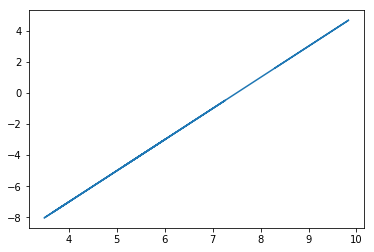

In [8]:
plt.plot( x, y )

In [9]:
yy = y + np.random.randn(10) # Добавим шум к каждому значению (измерению)

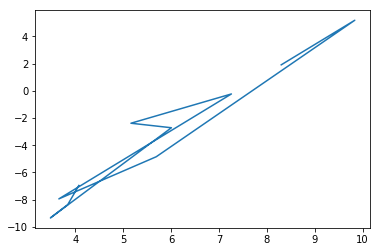

In [10]:
plt.plot( x, yy ) # Кривая как-то странно выглядит.

In [11]:
xx = np.sort( x ) # Дело в том, что необходимо отсортировать числа по оси x.
yy = xx * 2 - 15 + np.random.randn(10) # Теперь заново вычисляем.

In [12]:
yy.shape, x.shape # Массивы соответсвуют друг другу по размеру.

((10,), (10,))

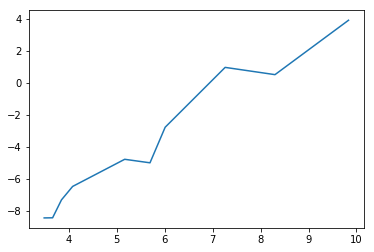

In [13]:
plt.plot( xx, yy )

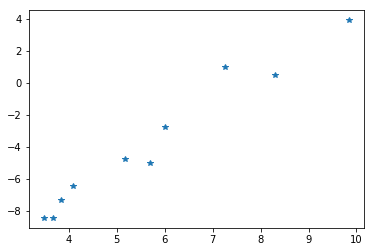

In [14]:
plt.plot( xx, yy, '*' )

<b>Линейная регрессия</b>

см заметку по питону:
[массивы и графики](http://машинноезрение.рф/pyth/2019-2020/pyth_08_array.html)

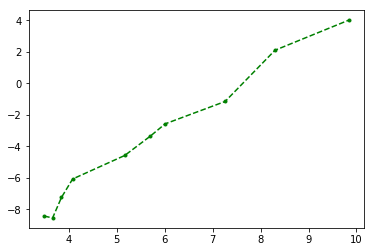

In [15]:
yy = xx * 2 - 15 + np.random.randn(10)/2 # Тоже самое но с меньшим шумом.
plt.plot( xx, yy, 'g.--') # Цвет зеленый, соединения пунктиром, точки маленькие.

In [16]:
qq = np.array([1,2,3,4,5,6,7,8,9])
qq

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# Меняем форму.
qq.reshape(3,3) # 9 = 3 * 3
# Такое же количество элементов.

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [18]:
qq # Исходный массив не изменился.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
# Если оличество элементов не будет совпадать.
qq.reshape(2,5) # 9 != 2 * 5

ValueError: cannot reshape array of size 9 into shape (2,5)

In [20]:
# Вектор столбец.
qq.reshape(9,1) # 9 - строк,
# 1 - колонка.

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [21]:
# Превращяем массив в вектор столбец,
q=xx.reshape(10,1)
q # т.е. массив массивов (из одного элемента).

array([[3.48262025],
       [3.65875112],
       [3.84391283],
       [4.07656667],
       [5.16317953],
       [5.69124355],
       [6.0078538 ],
       [7.25994188],
       [8.30007349],
       [9.8351899 ]])

In [22]:
np.ones(10).reshape(10,1) # Создаем вектор столбец единиц.

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [23]:
# Можно сразу. ones -- одни единицы.
np.ones( (10, 1) )

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [24]:
# Создаем общую матрицу. Присваеваем её переменной A.
A = np.concatenate( [np.ones((10,1)), q ], axis=1 )
A

array([[1.        , 3.48262025],
       [1.        , 3.65875112],
       [1.        , 3.84391283],
       [1.        , 4.07656667],
       [1.        , 5.16317953],
       [1.        , 5.69124355],
       [1.        , 6.0078538 ],
       [1.        , 7.25994188],
       [1.        , 8.30007349],
       [1.        , 9.8351899 ]])

In [25]:
xx

array([3.48262025, 3.65875112, 3.84391283, 4.07656667, 5.16317953,
       5.69124355, 6.0078538 , 7.25994188, 8.30007349, 9.8351899 ])

In [26]:
# Вычисляем псевдо обратную матрицу от A.
AA = np.linalg.pinv(A)
AA # Метод решения обычных систем не годится.

array([[ 0.40821805,  0.38408325,  0.35871098,  0.32683098,  0.17793499,
         0.10557562,  0.06219127, -0.1093794 , -0.25190618, -0.46225955],
       [-0.05377209, -0.04956151, -0.04513503, -0.03957321, -0.01359663,
        -0.00097273,  0.00659616,  0.03652858,  0.06139398,  0.09809248]])

In [27]:
# Теперь её используем для решения системы.
d = AA.dot( yy.reshape(10,1) )
d # В общем параметры приблизительно правельные.

array([[-14.8931006 ],
       [  1.97165695]])

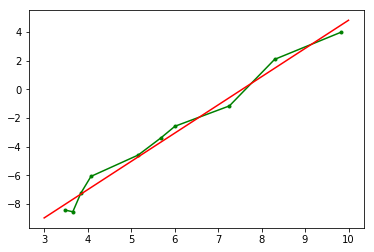

In [28]:
# Отрисуем получившуюся прямую. Используем для этого 100 точек.
p = np.linspace(3, 10, 100)
# Параметры вычисленной линии хранятся в переменной d.
yyy = p*d[1] + d[0]
plt.plot( xx, yy, 'g.-', p, yyy, 'r-')

<b>Функция потерь -- вычисление ошибки</b>

In [29]:
# Какая точность этого приближения?
xx[0]*d[1] + d[0], yy[0] # В даннойт точк значения вычисленные и табулированые:

(array([-8.0265682]), -8.432198363699234)

In [30]:
(xx[0]*d[1] + d[0])[0], yy[0]

(-8.026568204826951, -8.432198363699234)

In [31]:
for i in range(xx.shape[0]): # Цикл пробегает по всем нашим точкам
    print ( xx[i]*d[1] + d[0], yy[i] ) # Выводит два значения: вычисленное и табулированное.

[-8.0265682] -8.432198363699234
[-7.67929855] -8.54904422821145
[-7.31422317] -7.247206489158863
[-6.85550961] -6.078803374484259
[-4.71308183] -4.58717555225606
[-3.67192072] -3.3751536757676597
[-3.04767393] -2.5788362813936683
[-0.57898577] -1.1576229818774988
[1.47179695] 2.0920519946444465
[4.49851989] 3.9970440147484245


In [32]:
xx.shape[0], len(xx) 

(10, 10)

In [33]:
def evalLine(d, x): # Создадим функцию, которая по параметрам прямой (d) считаем значение в точке (x).
    return x * d[1] + d[0]

In [34]:
evalLine( d, xx[0]) # Вычислим значение в точке.
# Значение согласуется с предыдущими результатами.

array([-8.0265682])

In [35]:
# Посчитаем среднею ошибку по всем точкам.
sum1 = 0. # Линейная ошибка.
sum2 = 0. # Квадратичная ошибка.
for i in range(xx.shape[0]):
    err = evalLine( d, xx[i]) - yy[i]
    sum1 += err
    sum2 += err * err
    print ( xx[i]*d[1] + d[0], err )
print( "integral sum = ", sum1/xx.shape[0], sum2/xx.shape[0] )

[-8.0265682] [0.40563016]
[-7.67929855] [0.86974568]
[-7.31422317] [-0.06701668]
[-6.85550961] [-0.77670623]
[-4.71308183] [-0.12590628]
[-3.67192072] [-0.29676704]
[-3.04767393] [-0.46883765]
[-0.57898577] [0.57863721]
[1.47179695] [-0.62025505]
[4.49851989] [0.50147587]
integral sum =  [4.84057239e-15] [0.28235044]


ДЗ1 Почему сумма ошибка почти равна нулю? 

In [36]:
# Обособим данный подсчет в функцию.
# По параметрам прямой (d) и точкам (x,y) вычислим общую ошибку.

def errLineCycle(d, x, y):
    sum1 = 0.
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine( d, x[i]) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

# А можно так. Без циклов.
def errLine(d, x, y):
    xy = zip(x, y)
    err = list(map( lambda z : evalLine( d, z[0]) - z[1], xy))
    sum1 = sum( err )
    err = np.array( err )
    sum2 = sum( err * err )
    return sum1/x.shape[0], sum2/x.shape[0]

Упр. Как ещё сильнее сократить код за счет функции mean?

In [37]:
errLine(d, xx, yy), errLineCycle(d, xx, yy)

((array([4.84057239e-15]), array([0.28235044])),
 (array([4.84057239e-15]), array([0.28235044])))

Обособим код вычисляющий линейную регрессию в функцию.

In [38]:
# x, y задают данные. На выходе параметры линейной регрессии.
def fitLin(x, y):
    sz = x.shape[0]
    A = np.concatenate( [np.ones((sz,1)), x.reshape( sz, 1) ], axis=1 )
    Ai=np.linalg.pinv(A)
    return Ai.dot( y.reshape(sz,1) )

In [39]:
d0 = fitLin( xx, yy) # Проверим, что соответсвует редыдущим результатам.
d0

array([[-14.8931006 ],
       [  1.97165695]])

In [40]:
errLine(d0, xx, yy)

(array([4.84057239e-15]), array([0.28235044]))

<h1>Обучение и проверка</h1>
Learn and Test

<h2>Случайная выборка</h2>

In [41]:
perm = np.random.permutation( xx.shape[0] ) # Создаем перестановку числе от 0 до xx.shape[0] не включительно.
perm

array([8, 7, 5, 2, 6, 3, 1, 4, 0, 9])

In [42]:
#np.random.randint(0, xx.shape[0], 5)
ii = perm[:5] # Берем первые 5 чисел.
ii

array([8, 7, 5, 2, 6])

In [43]:
# Вычисляем параметры линейной регрессии для подмножества числе (ii)
d1 = fitLin( xx[ii], yy[ii])
d1

array([[-14.86710742],
       [  1.99558624]])

In [44]:
# Вычисляем ошибку на подмножестве.
ee = errLine(d1, xx[ii], yy[ii])
ee

(array([-9.76996262e-16]), array([0.17450673]))

In [45]:
jj=perm[5:]

In [46]:
errLine(d1, xx[jj], yy[jj]) # Вычисляем ошибку на всем множестве точек.

(array([0.32630854]), array([0.44822329]))

In [47]:
def experimentLin(n, d, p, k ):
    x = np.random.uniform( 3, 10, (n) )
    y = d[1] * x + d[0] + np.random.randn( x.shape[0] )/2
    d0 = fitLin( x, y)
    e0 = errLine(d0, x, y)
    
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    for j in range(k):
        perm = np.random.permutation( xx.shape[0] )
        ii = perm[:int(x.shape[0] * p)]#np.random.randint(0, x.shape[0], int(x.shape[0] * p) )
        d1 = fitLin( x[ii], y[ii])
        e1 = errLine(d1, x, y)
        ee10 += e1[0]
        ee11 += e1[1]
    print( e0, [ee10 / k, ee11 / k] )

In [48]:
experimentLin(10, np.array([-15, 2.5]), 0.85, 1000)

(array([4.06341627e-15]), array([0.08502094])) [array([-0.01084824]), array([0.09586735])]


ДЗ2: Построить статистику для ошибки. Вычислить её аналетически. 

<h2>Регуляризация</h2>

Свободу модули нужно как-то регулировать.

<h3>Количество параметров -- Случай полинома</h3>

In [49]:
# Рассмотрим случай полиномов. Тонее на них мы изучим другое важное поянтие машинного обучения. Регулиризация.
import numpy.polynomial.polynomial as poly

In [50]:
d

array([[-14.8931006 ],
       [  1.97165695]])

In [51]:
# Оказывается есть функция poly.polyval,
poly.polyval(xx[0], d ) # которая умеет вычилсять значение полинома.

array([-8.0265682])

In [52]:
xx.shape[0]

10

In [53]:
x.shape[0]

10

In [54]:
ee[0]

array([-9.76996262e-16])

In [55]:
d = np.array( [-10, -28, 2.2] ) # Параметры задающие параболу.

In [56]:
n = 10
x = np.random.uniform( 3, 10, (n) )
x = np.sort( x )
x

array([3.42049942, 4.50259727, 4.53607001, 4.99531549, 6.09240167,
       6.33951269, 7.24592257, 8.10846378, 8.56873776, 8.84866277])

In [57]:
y = poly.polyval(x, d ) + np.random.randn( x.shape[0] )/2

In [58]:
y

array([-79.9557404 , -92.02663004, -92.13989388, -94.79617426,
       -98.75217712, -98.50017266, -97.22526646, -92.76522946,
       -88.06800622, -84.80564093])

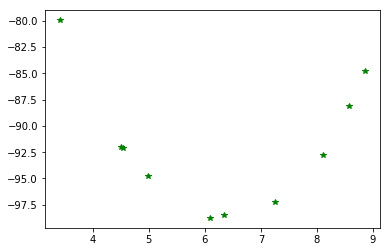

In [59]:
plt.plot( x, y, 'g*')

In [60]:
# Есть библиотечная функция для вычисления полиномиальной регрессии.
dd = poly.polyfit( x, y, x.shape[0] - 2 )
dd

array([ 4.63092194e+04, -6.24672239e+04,  3.61718742e+04, -1.17713963e+04,
        2.35615896e+03, -2.97257197e+02,  2.31025829e+01, -1.01208288e+00,
        1.91494654e-02])

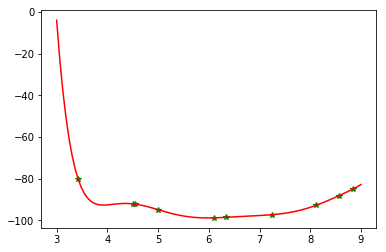

In [61]:
p = np.linspace(3, 9, 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

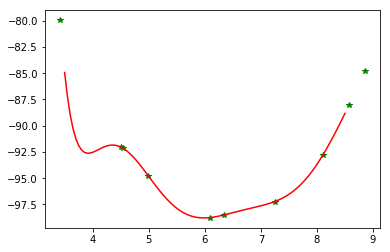

In [62]:
p = np.linspace(3.5, 8.5, 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

При полной свободе криая прошла через все точки. В данном случае точки из обучающего множества.

<b>Ручной режим</b>

Решим эту же задачу вручную.

In [63]:
q = x.reshape( n, 1)
q

array([[3.42049942],
       [4.50259727],
       [4.53607001],
       [4.99531549],
       [6.09240167],
       [6.33951269],
       [7.24592257],
       [8.10846378],
       [8.56873776],
       [8.84866277]])

In [64]:
q**2

array([[11.69981625],
       [20.27338216],
       [20.57593109],
       [24.95317685],
       [37.1173581 ],
       [40.1894211 ],
       [52.50339385],
       [65.74718488],
       [73.42326678],
       [78.2988329 ]])

In [65]:
A = np.concatenate( [np.ones((n,1)), q, q**2, q**3, q**4, q**5, q**6, q**7, q**8], axis=1 )

In [66]:
Ai = np.linalg.pinv( A )
dd = Ai.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd #, dd.shape
#print( A.shape, Ai.shape, n )

array([ 4.63105107e+04, -6.24691490e+04,  3.61731095e+04, -1.17718419e+04,
        2.35625782e+03, -2.97271014e+02,  2.31037719e+01, -1.01214050e+00,
        1.91506699e-02])

In [67]:
AA = A.transpose().dot( A )
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([ 1.43727857e+04, -1.86035703e+04,  1.03426785e+04, -3.22120879e+03,
         6.13748635e+02, -7.32434683e+01,  5.34522336e+00, -2.17994580e-01,
         3.80016159e-03]), (9,))

<b>Стабильность</b>

In [68]:
AApinv2, residuals, rank, s= np.linalg.lstsq( A, y )
AApinv2

/data/conda/anaconda3/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 4.63105107e+04, -6.24691490e+04,  3.61731095e+04, -1.17718419e+04,
        2.35625782e+03, -2.97271014e+02,  2.31037719e+01, -1.01214050e+00,
        1.91506700e-02])

In [69]:
residuals, rank # Сумма ошибок отклонения. И ранг.

(array([0.00016275]), 9)

In [70]:
s # Собственные значения.

array([5.20718456e+07, 2.92958119e+05, 5.76706172e+03, 2.08503781e+02,
       9.29668366e+00, 5.98819019e-01, 1.56239725e-02, 4.41445741e-04,
       2.92450547e-06])

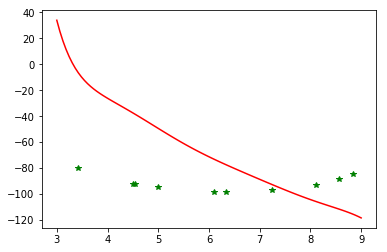

In [71]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

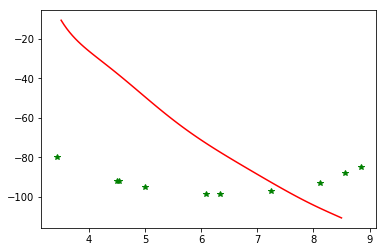

In [72]:
p = np.linspace(3.5, 8.5, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

Чего-то полного совпадения нет...

<h3>Магнитуда коэффициентов</h3>

Можно ограничить диапазон значений коэффициентов, т.е. мы считаем, что коэффициенты для рассматриваемых данных не должен привывашь тысячи....а может и 100.

Для этого нужно перейти к совсем ручному вычислению псевдо обратной матрицы.

In [73]:
AA = A.transpose().dot( A )
AA = AA  + 15 * np.eye( AA.shape[0] ) # Добавляем регулиризацию. 150
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([-2.22036143e-01, -5.57539777e-01, -1.20727558e+00, -2.00306077e+00,
        -1.73871211e+00,  1.13744538e+00, -2.30118171e-01,  2.00790045e-02,
        -6.50977920e-04]), (9,))

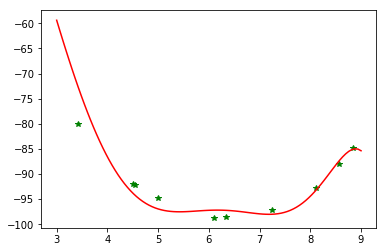

In [74]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

In [75]:
AA = A.transpose().dot( A )
U, s, V = np.linalg.svd( AA )
s # Собственые значения. Очень большой порядок их изменения.

array([2.71147710e+15, 8.58244596e+10, 3.32590009e+07, 4.34738267e+04,
       8.64283095e+01, 3.58636374e-01, 3.57958959e-04, 1.21720998e-04,
       9.63653624e-08])

In [76]:
s[0]/s[-1] # Собственные значения отсортированы. Делим наибольшее на наименьшее.

2.8137465940106507e+22

In [77]:
AA = AA  + 15 * np.eye( AA.shape[0] )
U, s, V = np.linalg.svd( AA )
s

array([2.71147710e+15, 8.58244596e+10, 3.32590159e+07, 4.34888268e+04,
       1.01428311e+02, 1.53585697e+01, 1.50002172e+01, 1.50000744e+01,
       1.49999723e+01])

In [78]:
s[0]/s[-1] # Порядок существенно уменьшен, хотя всеравно большой. np.trace?linalg.norm

180765473389518.88

In [79]:
a = np.array( [ [1, -2], [1, -2] ] )
U, s, V = np.linalg.svd(a, full_matrices=True)
U.shape, V.shape, s.shape

((2, 2), (2, 2), (2,))

In [80]:
print( U )
print( V )
print( s )

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
[3.16227766 0.        ]


In [81]:
S = np.diag( s )

In [82]:
np.allclose(a, np.dot(U, np.dot(S, V)))

True

In [83]:
# optimze gradient